In [1]:
import pandas as pd
csv_pathour = '/DATA1007/vaibhav/tokenization/CISLR/train.csv'
csv_path = "/DATA1007/sanjeet/ISL/tokenizer_file/22_M_sentences_with_uids_list_of_list.csv"

df = pd.read_csv(csv_path)
df1 = pd.read_csv(csv_pathour)    



ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean, median

# Load CSV (replace "my_file.csv" with your file)
#df = pd.read_csv("/DATA1007/sanjeet/ISL/tokenizer_file/22_M_sentences_with_uids_list_of_list.csv")
df = pd.read_csv("/DATA1007/vaibhav/tokenization/CISLR/train.csv")


In [16]:
import pandas as pd
csv_path = "/DATA3/vaibhav/isign/97CISLR/test.csv"
df = pd.read_csv(csv_path)


In [19]:
#print(df.head())
print(df['uid_list'][:3])

0    [['AEfFAtmkt6o', 'h0J-0nV_CoA_1'], ['Gm2HCSz7J...
1    [['AEfFAtmkt6o', 'h0J-0nV_CoA_1'], ['SKlTYkUBV...
2    [['AEfFAtmkt6o', 'h0J-0nV_CoA_1'], ['kusWSSN4x...
Name: uid_list, dtype: object


In [28]:
print(df.head())

                          sentence_good  \
0         The people hide these people.   
1          The people drive some plane.   
2  The children shoot some grandmother.   
3                    The people appear.   
4                 The children protest.   

                                       source_file  sentence_id  \
0  irregular_plural_subject_verb_agreement_2.jsonl            0   
1  irregular_plural_subject_verb_agreement_2.jsonl            1   
2  irregular_plural_subject_verb_agreement_2.jsonl            2   
3  irregular_plural_subject_verb_agreement_2.jsonl            3   
4  irregular_plural_subject_verb_agreement_2.jsonl            4   

                                 tokenized_sentences  \
0       ['the', 'people', 'hide', 'these', 'people']   
1        ['the', 'people', 'drive', 'some', 'plane']   
2  ['the', 'children', 'shoot', 'some', 'grandmot...   
3                        ['the', 'people', 'appear']   
4                     ['the', 'children', 'protest']   

 

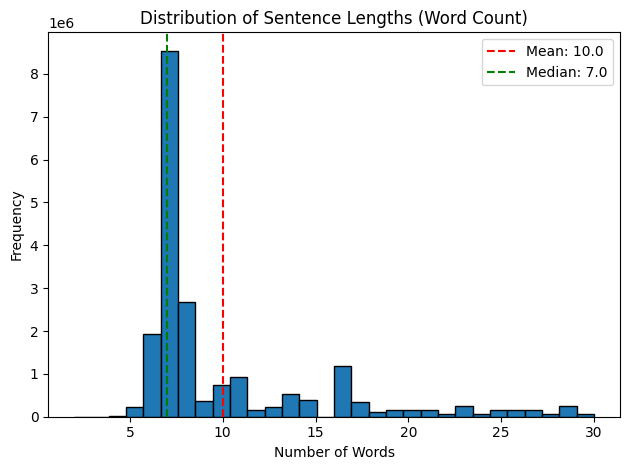

In [41]:

# Count words in each sentence
word_counts = df["text"].fillna("").str.split().str.len()

# Plot histogram
plt.hist(word_counts, bins=30, edgecolor="black")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Distribution of Sentence Lengths (Word Count)")
plt.axvline(mean(word_counts), color="red", linestyle="--", label=f"Mean: {mean(word_counts):.1f}")
plt.axvline(median(word_counts), color="green", linestyle="--", label=f"Median: {median(word_counts):.1f}")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:

word_counts = df["sentence_good"].fillna("").str.split().str.len()
length_distribution = word_counts.value_counts().to_dict()

# Sort dictionary by keys (sentence lengths)
sorted_length_distribution = dict(sorted(length_distribution.items(), key=lambda x: x[0]))

print(sorted_length_distribution)

{2: 15, 3: 582, 4: 13522, 5: 218617, 6: 1943015, 7: 8548435, 8: 2670343, 9: 359540, 10: 739367, 11: 930736, 12: 148025, 13: 225019, 14: 527424, 15: 401155, 16: 1189154, 17: 334524, 18: 108587, 19: 146547, 20: 149880, 21: 162523, 22: 60357, 23: 241829, 24: 71540, 25: 148330, 26: 153530, 27: 159361, 28: 63270, 29: 239194, 30: 70365, 31: 151944, 32: 146886, 33: 161421, 34: 67559, 35: 297260, 36: 83932, 37: 152261, 38: 154207, 39: 157789, 40: 56001, 41: 102623, 42: 36732, 43: 8573, 44: 94772, 45: 18530, 46: 8573, 47: 94772, 48: 18530, 49: 15449, 50: 175374, 51: 36490, 52: 13993, 53: 105789, 54: 18530, 55: 5135, 56: 11496}


In [34]:
import pandas as pd

word_counts = df["sentence_good"].fillna("").str.split().str.len()

above_20 = word_counts[word_counts > 20]
print(f"Number of sentences above 20 words: {len(above_20)}")

Number of sentences above 20 words: 3564920


In [11]:
word_counts = df["sentence_good"].fillna("").str.split().str.len()

# Filter out sentences with more than 20 words
above_20 = df.loc[word_counts < 10, "text"]

# Random sample of 5 sentences
sample_sentences = above_20.sample(5, random_state=42)
print(sample_sentences)

12984390    some that that some some that this some some s...
19044590    that that this some some lady should wear one ...
6173567       all some  all  all  some all these those  th...
15910443    that that some some some that this some some s...
14122794      all some  all  all  some all these those  th...
Name: text, dtype: object


In [12]:
print(df['text'][14122794])

  all some  all  all  some all these those  those children might wear one narrow dress and this this some this that this that some some that this this this that some boy might wear three.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

def create_fixed_splits(csv_path, output_dir, test_val_samples=7500, seed=42):
    # Read data
    df = pd.read_csv(csv_path)

    # Rename needed columns
    df = df.rename(columns={'final_sentence_raw': 'text', 'uids': 'uid_list'})

    # Drop unnecessary columns
    #columns_to_drop = ['source_file', 'sentence_id', 'tokenized_sentences']
    #columns_to_drop = ['Processed_Sentence', 'Removed_Word_Count', 'Removed_Percentage','Matched_Percentage', 'sentence_id'	,'tokenized_sentences']
    columns_to_drop = ['sentence_good'	,'Processed_Sentence',	'Removed_Word_Count',	
                       'Removed_Percentage',	'Matched_Percentage',	'sentence_id',	
                       'tokenized_sentences', 'processed_sentence',	'name_normalized_sentence', 	
                       'final_sentence']
    df = df.drop(columns=columns_to_drop)
    print(f"Before filtering >30-word sentences, total samples: {len(df):,}")
    
    # Filter rows where sentence has more than 20 words
    word_counts = df["text"].fillna("").str.split().str.len()
    df = df[word_counts <= 30]

    # First split: separate test set
    remaining_df, test_df = train_test_split(
        df,
        test_size=test_val_samples,
        random_state=seed,
        shuffle=True
    )

    # Second split: separate validation set
    train_df, val_df = train_test_split(
        remaining_df,
        test_size=test_val_samples,
        random_state=seed,
        shuffle=True
    )

    # Save splits
    train_df.to_csv(f"{output_dir}/train_MT_dedup.csv", index=False)
    val_df.to_csv(f"{output_dir}/val_MT_dedup.csv", index=False)
    test_df.to_csv(f"{output_dir}/test_MT_dedup.csv", index=False)

    print(f"After filtering >30-word sentences, total samples: {len(df):,}")
    print(f"Training samples: {len(train_df):,}")
    print(f"Validation samples: {len(val_df):,}")
    print(f"Testing samples: {len(test_df):,}")


In [17]:
print(len(df))

2


In [4]:

# Usage example
csv_path = "/DATACSEShare/sanjeet/Dataset/Sign_lanuguage_data_set/AI4Bharat_sentence_MT/Final_Processed_raw_sentences_MT_without_duplicates.csv"
output_dir = "/DATA3/vaibhav/isign/PretrainingISL/"
create_fixed_splits(csv_path, output_dir)

Before filtering >30-word sentences, total samples: 591,904
After filtering >30-word sentences, total samples: 591,692
Training samples: 576,692
Validation samples: 7,500
Testing samples: 7,500


In [1]:
import pandas as pd
isign_prev = pd.read_csv("/DATA7/vaibhav/tokenization/train_split_unicode_filtered.csv")
isign_new = pd.read_csv("/DATACSEShare/sanjeet/Dataset/Sign_lanuguage_data_set/isign/Final_Processed_raw_sentences_isign.csv")

In [2]:
# Change the column name from final_sentence_raw to text
isign_new = isign_new.rename(columns={'final_sentence_raw': 'text', 'text': 'previous_text'})
# Save the new file
isign_new.to_csv("/DATA3/vaibhav/isign/PretrainingISL/isign_new.csv", index=False)

In [4]:
isign_prev.head()


,uid,text,video_id,split
0,1782bea75c7d-3,"One day, Akbar drew a line on the floor and or...",1782bea75c7d,train
1,1782bea75c7d-5,but don't rub out any part of it.,1782bea75c7d,train
2,1782bea75c7d-6,No one knew what to do.,1782bea75c7d,train
3,1782bea75c7d-7,Each minister looked at the line and was puzzled.,1782bea75c7d,train
4,1782bea75c7d-8,No one could think of any way to make it longer.,1782bea75c7d,train


In [5]:
isign_new.head()

,uid,text,video_id,split,processed_sentence,name_normalized_sentence,final_sentence,final_sentence_raw
0,1782bea75c7d-3,"One day, Akbar drew a line on the floor and or...",1782bea75c7d,train,one day akbar draw a line on the floor and order,one day <PERSON> draw a line on the floor and ...,one day <PERSON> draw a line on the floor and ...,one day <PERSON> drew a line on the floor and ...
1,1782bea75c7d-5,but don't rub out any part of it.,1782bea75c7d,train,but do not rub out any part of it,but do not rub out any part of it,but do not rub out any part of it,but do not rub out any part of it
2,1782bea75c7d-6,No one knew what to do.,1782bea75c7d,train,no one know what to do,no one know what to do,no one know what to do,no one knew what to do
3,1782bea75c7d-7,Each minister looked at the line and was puzzled.,1782bea75c7d,train,each minister look at the line and be puzzle,each minister look at the line and be puzzle,each minister look at the line and be puzzle,each minister looked at the line and was puzzled
4,1782bea75c7d-8,No one could think of any way to make it longer.,1782bea75c7d,train,no one could think of any way to make it longer,no one could think of any way to make it longer,no one could think of any way to make it longer,no one could think of any way to make it longer


In [1]:
mt_file = pd.read_csv('/DATACSEShare/sanjeet/Dataset/Sign_lanuguage_data_set/AI4Bharat_sentence_MT/Final_Processed_raw_sentences_MT.csv')

NameError: name 'pd' is not defined

In [9]:
mt_file.head()

,sentence_good,Processed_Sentence,Removed_Word_Count,Removed_Percentage,Matched_Percentage,sentence_id,tokenized_sentences,uids,processed_sentence,name_normalized_sentence,final_sentence,final_sentence_raw
0,Search by name,search name,1,33.333333,100.0,0,"['search', 'name']","[['3ppf7DdzKvA', 'LSysLOgMsG8_1'], ['3I1fwIgGX...",search by name,search by name,search by name,search by name
1,Among those,among,1,50.000000,100.0,1,['among'],[['uBtYh10h6RU_1']],among those,among those,among those,among those
2,There is complete panic in the state,complete panic state,5,62.500000,100.0,2,"['complete', 'panic', 'state']","[['1wVR6wsoIfw_2'], ['A_ghucv_daw'], ['2p00fwB...",there be complete panic in the state,there be complete panic in the state,there be complete panic in the state,there is complete panic in the state
3,I am happy in life,happy life,4,66.666667,100.0,3,"['happy', 'life']","[['Jarh1WMa868_1', 'O9pRqLLFUEE_1', 'p9SdpeHMk...",i be happy in life,i be happy in life,i be happy in life,i am happy in life
4,I was like What do you mean,like mean,12,85.714286,100.0,4,"['like', 'mean']","[['FCMh8YKvD-8_1', 'T9eBnmIRtqg'], ['2lPUKkvlZ...",i be like what do you mean,i be like what do you mean,i be like what do you mean,i was like what do you mean
